<a href="https://colab.research.google.com/github/rebell32/CODSOFT/blob/main/irisflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [47]:
from google.colab import files

uploaded = files.upload()

Saving IRIS2.csv to IRIS2.csv


In [48]:
df = pd.read_csv("IRIS2.csv")
df.head(10)

,sno,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [49]:
df.describe().round(3)

,sno,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.054,3.759,1.199
std,43.445,0.828,0.434,1.764,0.763
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sno           150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
df.shape

(150, 6)

Check for unique values in species column

In [52]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Changing categorical data into numerical data by using OneHotEncoding

In [53]:
df['species']=df['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
df.head()

,sno,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Dropping null values

In [54]:
x=df.drop(['species'],axis=1)
y=df['species']
x.head()

,sno,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Dividing the data into training and testing sets

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8)

Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [58]:
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred=log.predict(x_test)
print(pred)

[1 2 0 0 2 2 1 0 0 2 0 1 2 0 2 0 2 2 1 2 2 2 0 1 1 2 0 1 2 0]


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
c=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)

In [61]:
print(c)

[[10  0  0]
 [ 0  7  0]
 [ 0  0 13]]


In [62]:
print(acc)

1.0


In [63]:
from sklearn.svm import SVC
svm =SVC()

In [64]:
svm.fit(x_train,y_train)

SVC()

In [65]:
predictions=svm.predict(x_test)
print(pred)

[1 2 0 0 2 2 1 0 0 2 0 1 2 0 2 0 2 2 1 2 2 2 0 1 1 2 0 1 2 0]


Confusion matrics = N x N , N= no of target classes
Rows = actual classes
Columns = predicted classes

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
c= confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)

In [67]:
print(c)

[[10  0  0]
 [ 0  7  0]
 [ 0  0 13]]


In [68]:
print(acc)

1.0


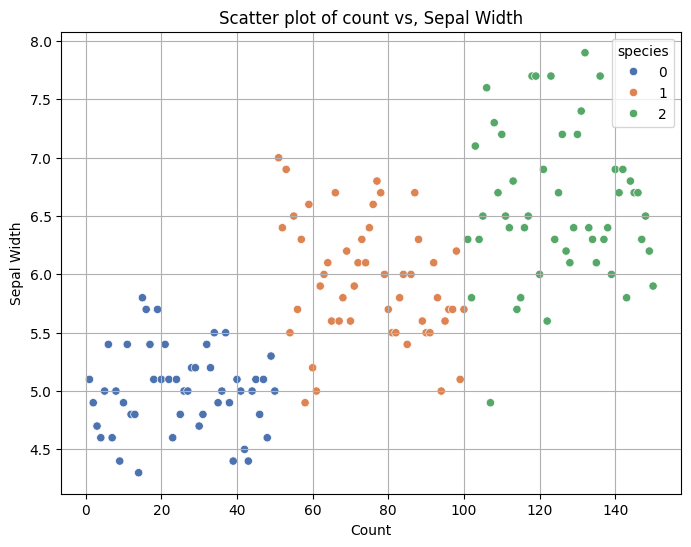

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sno',y='sepal_length',hue='species', palette='deep', data=df,color='blue')
plt.xlabel('Count')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of count vs, Sepal Width')
plt.grid(True)
plt.show()

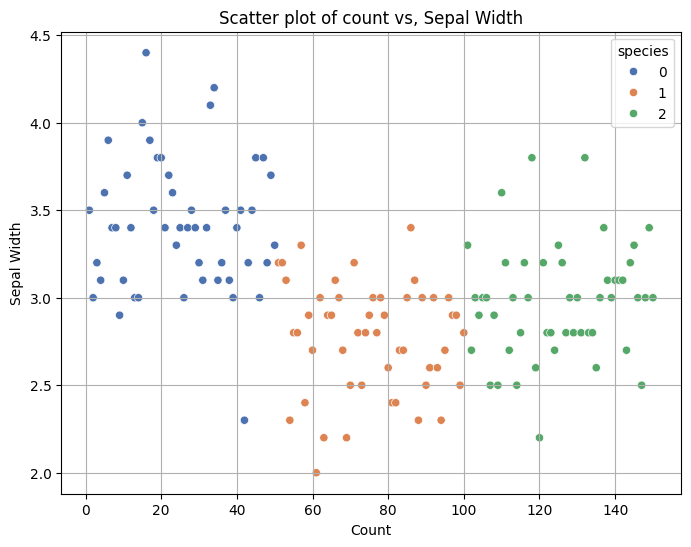

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sno',y='sepal_width',hue='species', palette='deep', data=df,color='blue')
plt.xlabel('Count')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of count vs, Sepal Width')
plt.grid(True)
plt.show()

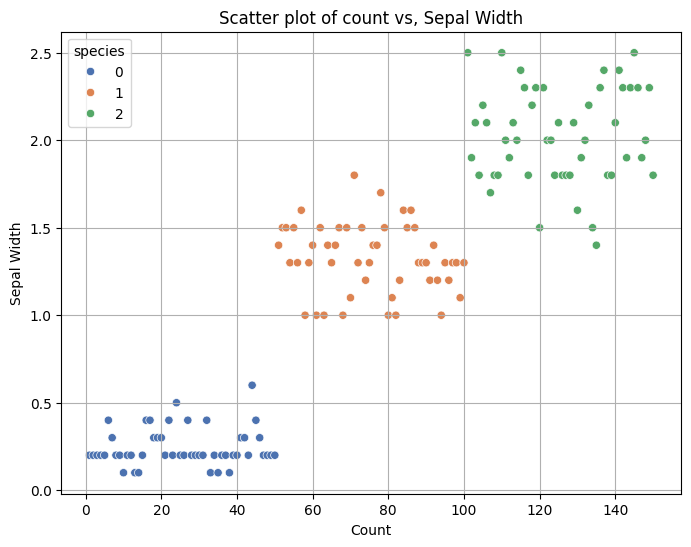

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sno',y='petal_width',hue='species', palette='deep', data=df,color='blue')
plt.xlabel('Count')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of count vs, Sepal Width')
plt.grid(True)
plt.show()